In [1]:
#imports
import pickle, pprint
import math
import netCDF4
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from tabulate import tabulate
import xarray as xr
import dask
import matplotlib
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib import ticker
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from mpl_toolkits.basemap import Basemap
bm = Basemap()
#import the relevant dataset
print('begin')
#Good_July.nc
path_to_file = '/fast/gmooers/Real_Geography_Manuscript/Preprocessed_Data/One_Month_July/full_physics_essentials_valid_month02_targets.nc'
real_ds = xr.open_dataset(path_to_file)

path_to_file = '/fast/gmooers/Real_Geography_Manuscript/Models/Good_July.nc'
test_ds = xr.open_dataset(path_to_file)

print('files imported')

heat_real_ds = real_ds.targets[:, :30].values
heat_test_ds = test_ds.Prediction[:, :30].values

moist_real_ds = real_ds.targets[:, 30:60].values
moist_test_ds = test_ds.Prediction[:, 30:60].values

times = real_ds.time.values

lats = real_ds.lat.values

lons = real_ds.lon.values

x = 144
y = 96
z = 30
t = int(len(heat_test_ds)/(x*y))
print(t)

SPCAM_Cycle = np.load("/fast/gmooers/RG_Paper_Data/Summer_Precip_Cycle_Truth.npy")

/export/home/gmooers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


begin
files imported
2975


In [2]:
path_to_file = '/fast/gmooers/Raw_Data/extras/TimestepOutput_Neuralnet_SPCAM_216.cam.h0.2018-07.nc'
land_frac = xr.open_dataset(path_to_file)
land_f = np.squeeze(land_frac.LANDFRAC.values)

new_land_frac = np.zeros(shape=(144, 96))
new_land_frac[:,:] = np.nan

for i in range(len(land_f)):
    for j in range(len(land_f[i])):
        new_land_frac[j, i] = land_f[i,j]

In [3]:
others = netCDF4.Dataset("/fast/gmooers/Raw_Data/extras/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-72000.nc")
plev = np.array(others.variables['lev'])
ps = np.array(others.variables['PS'])
g = 9.81 #m/s^2
#print(plev)
hyai = np.array(others.variables['hyai'])
hybi = np.array(others.variables['hybi'])
#print(hyai.shape)
#print(hyai)
cp = 1004.0
PS = 1e5
P0 = 1e5
P = P0*hyai+PS*hybi # Total pressure [Pa]
P=P/100.
P = P[:-1]

In [4]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

In [5]:
ocean_heat_reconstructed_targets = np.zeros(shape=(x, y, t, z))
ocean_heat_reconstructed_features = np.zeros(shape=(x, y, t, z))
land_heat_reconstructed_targets = np.zeros(shape=(x, y, t, z))
land_heat_reconstructed_features = np.zeros(shape=(x, y, t, z))

ocean_moist_reconstructed_targets = np.zeros(shape=(x, y, t, z))
ocean_moist_reconstructed_features = np.zeros(shape=(x, y, t, z))
land_moist_reconstructed_targets = np.zeros(shape=(x, y, t, z))
land_moist_reconstructed_features = np.zeros(shape=(x, y, t, z))

count = 0
for i in range(t):
    for j in range(y):
        for k in range(x):
            A = heat_real_ds[count]
            B = heat_test_ds[count]
            C = moist_real_ds[count]
            D = moist_test_ds[count]
            
            ocean_heat_reconstructed_targets[k, j, i, :] = A 
            ocean_heat_reconstructed_features[k, j, i, :] = B
            land_heat_reconstructed_targets[k, j, i, :] = A 
            land_heat_reconstructed_features[k, j, i, :] = B
            
            ocean_moist_reconstructed_targets[k, j, i, :] = C 
            ocean_moist_reconstructed_features[k, j, i, :] = D
            land_moist_reconstructed_targets[k, j, i, :] = C 
            land_moist_reconstructed_features[k, j, i, :] = D
            
            count = count + 1

In [6]:
#for i in range(len(ocean_heat_reconstructed_targets)):
#    for j in range(len(ocean_heat_reconstructed_targets[i])):
#        if np. isnan(SPCAM_Cycle[j,i]) == True:
#            ocean_heat_reconstructed_targets[k, j, :, :] = np.nan 
#            ocean_heat_reconstructed_features[k, j, :, :] = np.nan
#            land_heat_reconstructed_targets[k, j, :, :] = np.nan 
#            land_heat_reconstructed_features[k, j, :, :] = np.nan
#            
#            ocean_moist_reconstructed_targets[k, j, :, :] = np.nan 
#            ocean_moist_reconstructed_features[k, j, :, :] = np.nan
#            land_moist_reconstructed_targets[k, j, :, :] = np.nan 
#            land_moist_reconstructed_features[k, j, :, :] = np.nan
            

In [7]:
ocean_diurnal_heat_reconstructed_targets = np.zeros(shape=(x, y, 96, z))
ocean_diurnal_heat_reconstructed_targets[:,:,:,:] = np.nan 
ocean_diurnal_heat_reconstructed_features = np.zeros(shape=(x, y, 96, z))
ocean_diurnal_heat_reconstructed_features[:,:,:,:] = np.nan 
ocean_diurnal_moist_reconstructed_targets = np.zeros(shape=(x, y, 96, z))
ocean_diurnal_moist_reconstructed_targets[:,:,:,:] = np.nan
ocean_diurnal_moist_reconstructed_features = np.zeros(shape=(x, y, 96, z))
ocean_diurnal_moist_reconstructed_features[:,:,:,:] = np.nan 

land_diurnal_heat_reconstructed_targets = np.zeros(shape=(x, y, 96, z))
land_diurnal_heat_reconstructed_targets[:,:,:,:] = np.nan 
land_diurnal_heat_reconstructed_features = np.zeros(shape=(x, y, 96, z))
land_diurnal_heat_reconstructed_features[:,:,:,:] = np.nan 
land_diurnal_moist_reconstructed_targets = np.zeros(shape=(x, y, 96, z))
land_diurnal_moist_reconstructed_targets[:,:,:,:] = np.nan
land_diurnal_moist_reconstructed_features = np.zeros(shape=(x, y, 96, z))
land_diurnal_moist_reconstructed_features[:,:,:,:] = np.nan 


for i in range(96):
    ocean_diurnal_heat_reconstructed_targets[:,:,i,:] = np.nanmean(ocean_heat_reconstructed_targets[:,:,i::96,:],axis=2)
    ocean_diurnal_heat_reconstructed_features[:,:,i,:] = np.nanmean(ocean_heat_reconstructed_features[:,:,i::96,:],axis=2)
    land_diurnal_heat_reconstructed_targets[:,:,i,:] = np.nanmean(land_heat_reconstructed_targets[:,:,i::96,:],axis=2)
    land_diurnal_heat_reconstructed_features[:,:,i,:] = np.nanmean(land_heat_reconstructed_features[:,:,i::96,:],axis=2)
    
    ocean_diurnal_moist_reconstructed_targets[:,:,i,:] = np.nanmean(ocean_moist_reconstructed_targets[:,:,i::96,:],axis=2)
    ocean_diurnal_moist_reconstructed_features[:,:,i,:] = np.nanmean(ocean_moist_reconstructed_features[:,:,i::96,:],axis=2)
    land_diurnal_moist_reconstructed_targets[:,:,i,:] = np.nanmean(land_moist_reconstructed_targets[:,:,i::96,:],axis=2)
    land_diurnal_moist_reconstructed_features[:,:,i,:] = np.nanmean(land_moist_reconstructed_features[:,:,i::96,:],axis=2)

In [8]:
all_lons = lons[:144]
new_lats = lats[::96]
all_lats = new_lats[:96]

In [9]:
for i in range(96):
    for j in range(30):
        temp = np.squeeze(ocean_diurnal_heat_reconstructed_targets[:,:,i,j])
        temp[new_land_frac>0.5] = np.nan
        ocean_diurnal_heat_reconstructed_targets[:,:,i,j] = temp
    
        temp = np.squeeze(ocean_diurnal_heat_reconstructed_features[:,:,i,j])
        temp[new_land_frac>0.5] = np.nan
        ocean_diurnal_heat_reconstructed_features[:,:,i,j] = temp
    
        temp = np.squeeze(land_diurnal_heat_reconstructed_targets[:,:,i,j])
        temp[new_land_frac<0.5] = np.nan
        land_diurnal_heat_reconstructed_targets[:,:,i,j] = temp
    
        temp = np.squeeze(land_diurnal_heat_reconstructed_features[:,:,i,j])
        temp[new_land_frac<0.5] = np.nan
        land_diurnal_heat_reconstructed_features[:,:,i,j] = temp
        
        temp = np.squeeze(ocean_diurnal_moist_reconstructed_targets[:,:,i,j])
        temp[new_land_frac>0.5] = np.nan
        ocean_diurnal_moist_reconstructed_targets[:,:,i,j] = temp
    
        temp = np.squeeze(ocean_diurnal_moist_reconstructed_features[:,:,i,j])
        temp[new_land_frac>0.5] = np.nan
        ocean_diurnal_moist_reconstructed_features[:,:,i,j] = temp
    
        temp = np.squeeze(land_diurnal_moist_reconstructed_targets[:,:,i,j])
        temp[new_land_frac<0.5] = np.nan
        land_diurnal_moist_reconstructed_targets[:,:,i,j] = temp
    
        temp = np.squeeze(land_diurnal_moist_reconstructed_features[:,:,i,j])
        temp[new_land_frac<0.5] = np.nan
        land_diurnal_moist_reconstructed_features[:,:,i,j] = temp

In [10]:
ocean_heat_SPCAM5_composite = np.nanmean(ocean_diurnal_heat_reconstructed_targets, axis = 1)
ocean_heat_DNN_composite = np.nanmean(ocean_diurnal_heat_reconstructed_features, axis = 1)

land_heat_SPCAM5_composite = np.nanmean(land_diurnal_heat_reconstructed_targets, axis = 1)
land_heat_DNN_composite = np.nanmean(land_diurnal_heat_reconstructed_features, axis = 1)

ocean_moist_SPCAM5_composite = np.nanmean(ocean_diurnal_moist_reconstructed_targets, axis = 1)
ocean_moist_DNN_composite = np.nanmean(ocean_diurnal_moist_reconstructed_features, axis = 1)

land_moist_SPCAM5_composite = np.nanmean(land_diurnal_moist_reconstructed_targets, axis = 1)
land_moist_DNN_composite = np.nanmean(land_diurnal_moist_reconstructed_features, axis = 1)

In [11]:
ocean_lst_heat_SPCAM5_composite = np.zeros(shape=(144, 96, 30))
ocean_lst_heat_SPCAM5_composite[:,:,:] = np.nan
ocean_lst_heat_DNN_composite = np.zeros(shape=(144, 96, 30))
ocean_lst_heat_DNN_composite[:,:,:] = np.nan
land_lst_heat_SPCAM5_composite = np.zeros(shape=(144, 96, 30))
land_lst_heat_SPCAM5_composite[:,:,:] = np.nan
land_lst_heat_DNN_composite = np.zeros(shape=(144, 96, 30))
land_lst_heat_DNN_composite[:,:,:] = np.nan

ocean_lst_moist_SPCAM5_composite = np.zeros(shape=(144, 96, 30))
ocean_lst_moist_SPCAM5_composite[:,:,:] = np.nan
ocean_lst_moist_DNN_composite = np.zeros(shape=(144, 96, 30))
ocean_lst_moist_DNN_composite[:,:,:] = np.nan
land_lst_moist_SPCAM5_composite = np.zeros(shape=(144, 96, 30))
land_lst_moist_SPCAM5_composite[:,:,:] = np.nan
land_lst_moist_DNN_composite = np.zeros(shape=(144, 96, 30))
land_lst_moist_DNN_composite[:,:,:] = np.nan

for i in range(len(all_lons)):
    splitter = int(round((all_lons[i]/360.)*96.))
    #splitter = splitter+1
    part_a_heat_SPCAM5_composite = ocean_heat_SPCAM5_composite[i,:-splitter,:]
    part_b_heat_SPCAM5_composite = ocean_heat_SPCAM5_composite[i,-splitter:,:]
    combined_heat_SPCAM5_composite = np.concatenate((part_b_heat_SPCAM5_composite, part_a_heat_SPCAM5_composite), axis=0)
    ocean_lst_heat_SPCAM5_composite[i,:,:] = combined_heat_SPCAM5_composite
    
    part_a_heat_SPCAM5_composite = land_heat_SPCAM5_composite[i,:-splitter,:]
    part_b_heat_SPCAM5_composite = land_heat_SPCAM5_composite[i,-splitter:,:]
    combined_heat_SPCAM5_composite = np.concatenate((part_b_heat_SPCAM5_composite, part_a_heat_SPCAM5_composite), axis=0)
    land_lst_heat_SPCAM5_composite[i,:,:] = combined_heat_SPCAM5_composite
        
    part_a_heat_DNN_composite = ocean_heat_DNN_composite[i,:-splitter,:]
    part_b_heat_DNN_composite = ocean_heat_DNN_composite[i,-splitter:,:]
    combined_heat_DNN_composite = np.concatenate((part_b_heat_DNN_composite, part_a_heat_DNN_composite), axis=0)
    ocean_lst_heat_DNN_composite[i,:,:] = combined_heat_DNN_composite
    
    part_a_heat_DNN_composite = land_heat_DNN_composite[i,:-splitter,:]
    part_b_heat_DNN_composite = land_heat_DNN_composite[i,-splitter:,:]
    combined_heat_DNN_composite = np.concatenate((part_b_heat_DNN_composite, part_a_heat_DNN_composite), axis=0)
    land_lst_heat_DNN_composite[i,:,:] = combined_heat_DNN_composite
    
    part_a_moist_SPCAM5_composite = ocean_moist_SPCAM5_composite[i,:-splitter,:]
    part_b_moist_SPCAM5_composite = ocean_moist_SPCAM5_composite[i,-splitter:,:]
    combined_moist_SPCAM5_composite = np.concatenate((part_b_moist_SPCAM5_composite, part_a_moist_SPCAM5_composite), axis=0)
    ocean_lst_moist_SPCAM5_composite[i,:,:] = combined_moist_SPCAM5_composite
    
    part_a_moist_SPCAM5_composite = land_moist_SPCAM5_composite[i,:-splitter,:]
    part_b_moist_SPCAM5_composite = land_moist_SPCAM5_composite[i,-splitter:,:]
    combined_moist_SPCAM5_composite = np.concatenate((part_b_moist_SPCAM5_composite, part_a_moist_SPCAM5_composite), axis=0)
    land_lst_moist_SPCAM5_composite[i,:,:] = combined_moist_SPCAM5_composite
        
    part_a_moist_DNN_composite = ocean_moist_DNN_composite[i,:-splitter,:]
    part_b_moist_DNN_composite = ocean_moist_DNN_composite[i,-splitter:,:]
    combined_moist_DNN_composite = np.concatenate((part_b_moist_DNN_composite, part_a_moist_DNN_composite), axis=0)
    ocean_lst_moist_DNN_composite[i,:,:] = combined_moist_DNN_composite
    
    part_a_moist_DNN_composite = land_moist_DNN_composite[i,:-splitter,:]
    part_b_moist_DNN_composite = land_moist_DNN_composite[i,-splitter:,:]
    combined_moist_DNN_composite = np.concatenate((part_b_moist_DNN_composite, part_a_moist_DNN_composite), axis=0)
    land_lst_moist_DNN_composite[i,:,:] = combined_moist_DNN_composite

In [12]:
ocean_final_lst_heat_SPCAM5_composite = np.nanmean(ocean_lst_heat_SPCAM5_composite, axis=0) 
ocean_final_lst_heat_DNN_composite = np.nanmean(ocean_lst_heat_DNN_composite, axis=0) 
land_final_lst_heat_SPCAM5_composite = np.nanmean(land_lst_heat_SPCAM5_composite, axis=0) 
land_final_lst_heat_DNN_composite = np.nanmean(land_lst_heat_DNN_composite, axis=0) 

ocean_final_lst_moist_SPCAM5_composite = np.nanmean(ocean_lst_moist_SPCAM5_composite, axis=0) 
ocean_final_lst_moist_DNN_composite = np.nanmean(ocean_lst_moist_DNN_composite, axis=0) 
land_final_lst_moist_SPCAM5_composite = np.nanmean(land_lst_moist_SPCAM5_composite, axis=0) 
land_final_lst_moist_DNN_composite = np.nanmean(land_lst_moist_DNN_composite, axis=0) 

In [13]:
timing = np.linspace(0,23.75,96)
T, Z = np.meshgrid(timing, P)

In [14]:
ocean_mean_lst_heat_SPCAM5_composite = np.nanmean(ocean_final_lst_heat_SPCAM5_composite, axis = 0)
ocean_mean_lst_heat_DNN_composite = np.nanmean(ocean_final_lst_heat_DNN_composite, axis = 0)
land_mean_lst_heat_SPCAM5_composite = np.nanmean(land_final_lst_heat_SPCAM5_composite, axis = 0)
land_mean_lst_heat_DNN_composite = np.nanmean(land_final_lst_heat_DNN_composite, axis = 0)

ocean_mean_lst_moist_SPCAM5_composite = np.nanmean(ocean_final_lst_moist_SPCAM5_composite, axis = 0)
ocean_mean_lst_moist_DNN_composite = np.nanmean(ocean_final_lst_moist_DNN_composite, axis = 0)
land_mean_lst_moist_SPCAM5_composite = np.nanmean(land_final_lst_moist_SPCAM5_composite, axis = 0)
land_mean_lst_moist_DNN_composite = np.nanmean(land_final_lst_moist_DNN_composite, axis = 0)

ocean_anon_lst_heat_SPCAM5_composite = np.zeros(shape=(96, 30))
ocean_anon_lst_heat_DNN_composite = np.zeros(shape=(96, 30))
land_anon_lst_heat_SPCAM5_composite = np.zeros(shape=(96, 30))
land_anon_lst_heat_DNN_composite = np.zeros(shape=(96, 30))

ocean_anon_lst_moist_SPCAM5_composite = np.zeros(shape=(96, 30))
ocean_anon_lst_moist_DNN_composite = np.zeros(shape=(96, 30))
land_anon_lst_moist_SPCAM5_composite = np.zeros(shape=(96, 30))
land_anon_lst_moist_DNN_composite = np.zeros(shape=(96, 30))


for i in range(96):
    ocean_anon_lst_heat_SPCAM5_composite[i,:] = ocean_final_lst_heat_SPCAM5_composite[i,:] - ocean_mean_lst_heat_SPCAM5_composite
    ocean_anon_lst_heat_DNN_composite[i,:] = ocean_final_lst_heat_DNN_composite[i,:] - ocean_mean_lst_heat_DNN_composite
    land_anon_lst_heat_SPCAM5_composite[i,:] = land_final_lst_heat_SPCAM5_composite[i,:] - land_mean_lst_heat_SPCAM5_composite
    land_anon_lst_heat_DNN_composite[i,:] = land_final_lst_heat_DNN_composite[i,:] - land_mean_lst_heat_DNN_composite
    
    ocean_anon_lst_moist_SPCAM5_composite[i,:] = ocean_final_lst_moist_SPCAM5_composite[i,:] - ocean_mean_lst_moist_SPCAM5_composite
    ocean_anon_lst_moist_DNN_composite[i,:] = ocean_final_lst_moist_DNN_composite[i,:] - ocean_mean_lst_moist_DNN_composite
    land_anon_lst_moist_SPCAM5_composite[i,:] = land_final_lst_moist_SPCAM5_composite[i,:] - land_mean_lst_moist_SPCAM5_composite
    land_anon_lst_moist_DNN_composite[i,:] = land_final_lst_moist_DNN_composite[i,:] - land_mean_lst_moist_DNN_composite


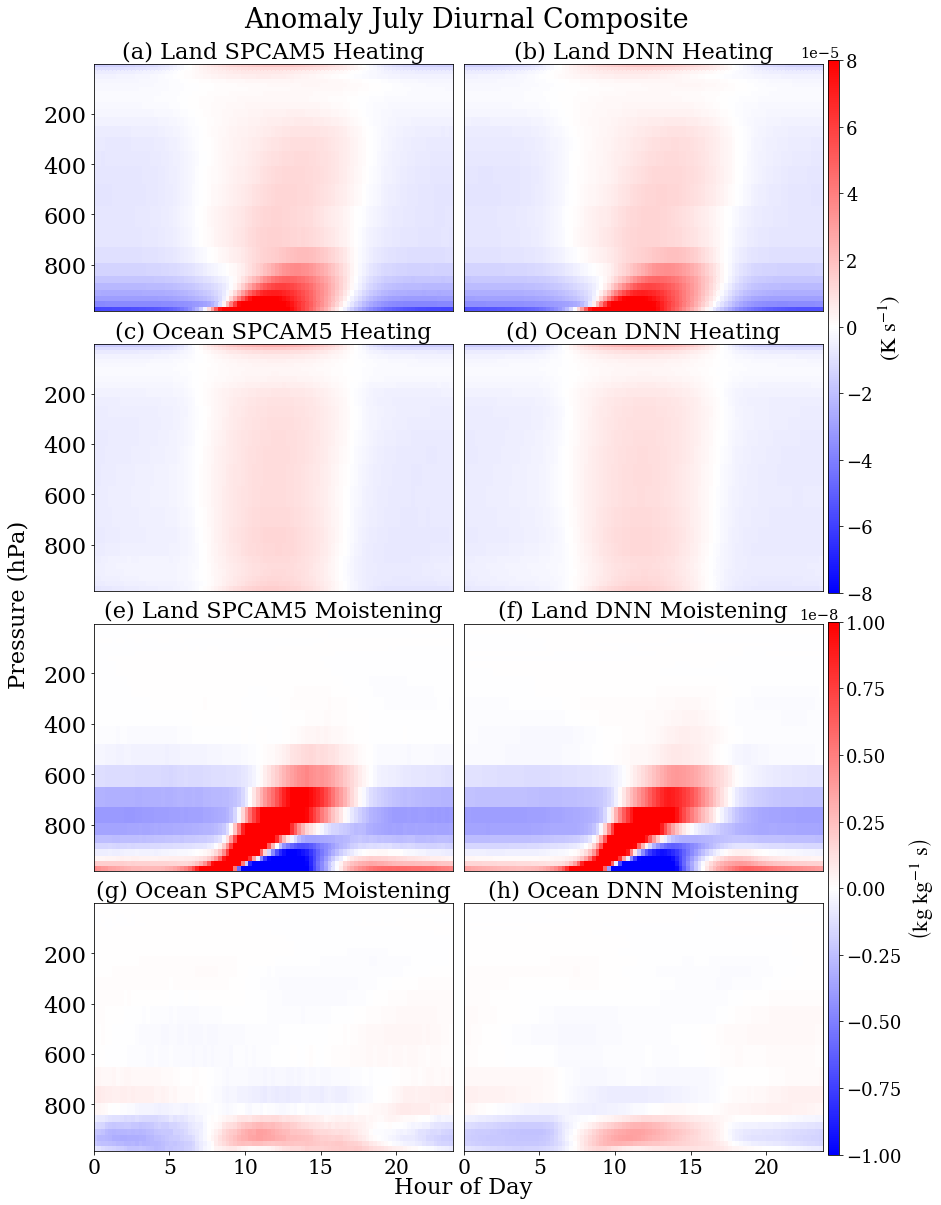

In [15]:
fig, ax = plt.subplots(4,2, figsize=(15,20))

cp = ax[0,0].pcolor(T, Z, land_anon_lst_heat_SPCAM5_composite.T, cmap = 'bwr', vmin = -8.0e-5, vmax=8.0e-5)
ax[0,0].set_title("(a) Land SPCAM5 Heating", fontsize = fz)
ax[0,0].locator_params(nbins=8)
ax[0,0].tick_params(axis='x', labelsize=fz*0.9)
ax[0,0].set_ylim(ax[0,0].get_ylim()[::-1])
ax[0,0].set_xticks([])

cp = ax[0,1].pcolor(T, Z, land_anon_lst_heat_DNN_composite.T, cmap = 'bwr', vmin = -8.0e-5, vmax=8.0e-5)
ax[0,1].set_title("(b) Land DNN Heating", fontsize = fz)
ax[0,1].set_ylim(ax[0,1].get_ylim()[::-1])
ax[0,1].set_yticks([])
ax[0,1].set_xticks([])
#ax[1,1].set_xlabel("Hour of Day")
#ax[1,1].xaxis.set_label_coords(-0.001,-0.10)
ax[0,1].locator_params(nbins=8)
ax[0,1].tick_params(axis='x', labelsize=fz*0.9)

cp = ax[1,0].pcolor(T, Z, ocean_anon_lst_heat_SPCAM5_composite.T, cmap = 'bwr', vmin = -8.0e-5, vmax=8.0e-5)
ax[1,0].set_title("(c) Ocean SPCAM5 Heating", fontsize = fz)
ax[1,0].set_ylim(ax[1,0].get_ylim()[::-1])
ax[1,0].locator_params(nbins=8)
ax[1,0].tick_params(axis='x', labelsize=fz*0.9)
ax[1,0].set_xticks([])

cp = ax[1,1].pcolor(T, Z, ocean_anon_lst_heat_DNN_composite.T, cmap = 'bwr', vmin = -8.0e-5, vmax=8.0e-5)
ax[1,1].set_title("(d) Ocean DNN Heating", fontsize = fz)
ax[1,1].set_ylim(ax[1,1].get_ylim()[::-1])
ax[1,1].set_yticks([])
ax[1,1].set_xticks([])
ax[1,1].set_ylabel("Pressure (hPa)")
ax[1,1].yaxis.set_label_coords(-1.21,-0.05)
ax[1,1].locator_params(nbins=8)
ax[1,1].tick_params(axis='x', labelsize=fz*0.9)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.805, 0.5125, 0.01, 0.37])
cbar = fig.colorbar(cp, label=r'$\left(\mathrm{K} \ \mathrm{s^{-1}}\right)$', cax=cbar_ax)
cbar.ax.tick_params(labelsize=fz*0.8) 
cbar.formatter.set_powerlimits((0, 0))
cbar.ax.yaxis.get_offset_text().set(size=fz*0.65)
#register_bottom_offset(cbar.ax.yaxis, bottom_offset)

cp = ax[2,0].pcolor(T, Z, land_anon_lst_moist_SPCAM5_composite.T, cmap = 'bwr', vmin=-1e-8, vmax=1e-8)
ax[2,0].set_title("(e) Land SPCAM5 Moistening", fontsize = fz)
ax[2,0].locator_params(nbins=8)
ax[2,0].tick_params(axis='x', labelsize=fz*0.9)
ax[2,0].set_ylim(ax[2,0].get_ylim()[::-1])
#ax[2,0].set_yticks([])
ax[2,0].set_xticks([])

cp = ax[2,1].pcolor(T, Z, land_anon_lst_moist_DNN_composite.T, cmap = 'bwr', vmin=-1e-8, vmax=1e-8)
ax[2,1].set_title("(f) Land DNN Moistening", fontsize = fz)
ax[2,1].set_ylim(ax[2,1].get_ylim()[::-1])
ax[2,1].set_yticks([])
ax[3,1].set_xlabel("Hour of Day")
ax[3,1].xaxis.set_label_coords(-0.0,-0.10)
ax[2,1].locator_params(nbins=8)
ax[2,1].tick_params(axis='x', labelsize=fz*0.9)
ax[2,1].set_yticks([])
ax[2,1].set_xticks([])

cp = ax[3,0].pcolor(T, Z, ocean_anon_lst_moist_SPCAM5_composite.T, cmap = 'bwr', vmin=-1e-8, vmax=1e-8)
ax[3,0].set_title("(g) Ocean SPCAM5 Moistening", fontsize = fz)
ax[3,0].set_ylim(ax[3,0].get_ylim()[::-1])
ax[3,0].locator_params(nbins=8)
ax[3,0].tick_params(axis='x', labelsize=fz*0.9)
#ax[3,0].set_xticks([])

cp = ax[3,1].pcolor(T, Z, ocean_anon_lst_moist_DNN_composite.T, cmap = 'bwr', vmin=-1e-8, vmax=1e-8)
ax[3,1].set_title("(h) Ocean DNN Moistening", fontsize = fz)
ax[3,1].set_ylim(ax[3,1].get_ylim()[::-1])
ax[3,1].set_yticks([])
#ax[3,1].set_xticks([])
#ax[1,1].set_xlabel("Hour of Day")
#ax[1,1].xaxis.set_label_coords(-0.10,-0.10)
ax[3,1].locator_params(nbins=8)
ax[3,1].tick_params(axis='x', labelsize=fz*0.9)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.805, 0.1225, 0.01, 0.37])
cbar = fig.colorbar(cp, label=r'$\left(\mathrm{kg} \ \mathrm{kg^{-1}} \ \mathrm{s}\right)$', cax=cbar_ax)
cbar.ax.tick_params(labelsize=fz*0.8) 
cbar.formatter.set_powerlimits((0, 0))
cbar.ax.yaxis.get_offset_text().set(size=fz*0.65)
#register_bottom_offset(cbar.ax.yaxis, bottom_offset)

plt.suptitle("Anomaly July Diurnal Composite", y = 0.92, x=0.47)
plt.subplots_adjust(hspace=0.13, wspace=0.03)
plt.savefig("/fast/gmooers/Real_Geography_Manuscript/Figures/Unmasked_Anon_Regional_LST_Figure21.png")
plt.savefig("/fast/gmooers/Real_Geography_Manuscript/Figures/Unmasked_Anon_Regional_LST_Figure21.pdf")
#plt.savefig("Test_Figures/Anon_masked_Reg_Regional_LST_Figure21.png")
#plt.savefig("Test_Figures/Anon_masked_Reg_Regional_LST_Figure21.pdf")

In [16]:
np.save("/fast/gmooers/Real_Geography_Manuscript/Compressed_Data/X_vals.npy", T)
np.save("/fast/gmooers/Real_Geography_Manuscript/Compressed_Data/Z_vals.npy", Z)
np.save("/fast/gmooers/Real_Geography_Manuscript/Compressed_Data/Unmasked_LST_anon_ocean_heat_SPCAM5_composite.npy", ocean_anon_lst_heat_SPCAM5_composite)
np.save("/fast/gmooers/Real_Geography_Manuscript/Compressed_Data/Unmasked_LST_anon_ocean_heat_DNN_composite.npy", ocean_anon_lst_heat_DNN_composite)
np.save("/fast/gmooers/Real_Geography_Manuscript/Compressed_Data/Unmasked_LST_anon_land_heat_SPCAM5_composite.npy", land_anon_lst_heat_SPCAM5_composite)
np.save("/fast/gmooers/Real_Geography_Manuscript/Compressed_Data/Unmasked_LST_anon_land_heat_DNN_composite.npy", land_anon_lst_heat_DNN_composite)
np.save("/fast/gmooers/Real_Geography_Manuscript/Compressed_Data/Unmasked_LST_anon_ocean_moist_SPCAM5_composite.npy", ocean_anon_lst_moist_SPCAM5_composite)
np.save("/fast/gmooers/Real_Geography_Manuscript/Compressed_Data/Unmasked_LST_anon_ocean_moist_DNN_composite.npy", ocean_anon_lst_moist_DNN_composite)
np.save("/fast/gmooers/Real_Geography_Manuscript/Compressed_Data/Unmasked_LST_anon_land_moist_SPCAM5_composite.npy", land_anon_lst_moist_SPCAM5_composite)
np.save("/fast/gmooers/Real_Geography_Manuscript/Compressed_Data/Unmasked_LST_anon_land_moist_DNN_composite.npy", land_anon_lst_moist_DNN_composite)

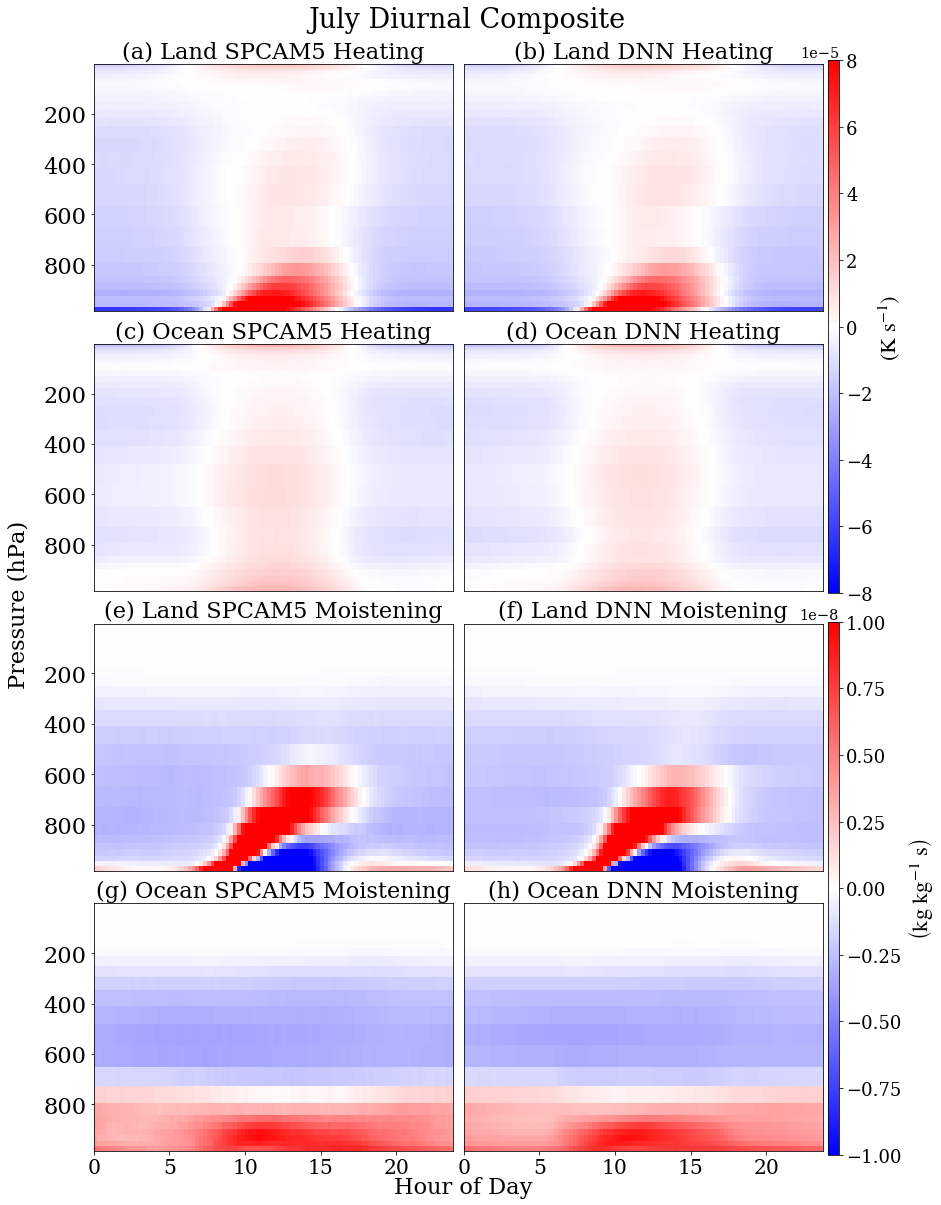

In [17]:
fig, ax = plt.subplots(4,2, figsize=(15,20))

cp = ax[0,0].pcolor(T, Z, land_final_lst_heat_SPCAM5_composite.T, cmap = 'bwr', vmin = -8.0e-5, vmax=8.0e-5)
ax[0,0].set_title("(a) Land SPCAM5 Heating", fontsize = fz)
ax[0,0].locator_params(nbins=8)
ax[0,0].tick_params(axis='x', labelsize=fz*0.9)
ax[0,0].set_ylim(ax[0,0].get_ylim()[::-1])
ax[0,0].set_xticks([])

cp = ax[0,1].pcolor(T, Z, land_final_lst_heat_DNN_composite.T, cmap = 'bwr', vmin = -8.0e-5, vmax=8.0e-5)
ax[0,1].set_title("(b) Land DNN Heating", fontsize = fz)
ax[0,1].set_ylim(ax[0,1].get_ylim()[::-1])
ax[0,1].set_yticks([])
ax[0,1].set_xticks([])
#ax[1,1].set_xlabel("Hour of Day")
#ax[1,1].xaxis.set_label_coords(-0.001,-0.10)
ax[0,1].locator_params(nbins=8)
ax[0,1].tick_params(axis='x', labelsize=fz*0.9)

cp = ax[1,0].pcolor(T, Z, ocean_final_lst_heat_SPCAM5_composite.T, cmap = 'bwr', vmin = -8.0e-5, vmax=8.0e-5)
ax[1,0].set_title("(c) Ocean SPCAM5 Heating", fontsize = fz)
ax[1,0].set_ylim(ax[1,0].get_ylim()[::-1])
ax[1,0].locator_params(nbins=8)
ax[1,0].tick_params(axis='x', labelsize=fz*0.9)
ax[1,0].set_xticks([])

cp = ax[1,1].pcolor(T, Z, ocean_final_lst_heat_DNN_composite.T, cmap = 'bwr', vmin = -8.0e-5, vmax=8.0e-5)
ax[1,1].set_title("(d) Ocean DNN Heating", fontsize = fz)
ax[1,1].set_ylim(ax[1,1].get_ylim()[::-1])
ax[1,1].set_yticks([])
ax[1,1].set_xticks([])
ax[1,1].set_ylabel("Pressure (hPa)")
ax[1,1].yaxis.set_label_coords(-1.21,-0.05)
ax[1,1].locator_params(nbins=8)
ax[1,1].tick_params(axis='x', labelsize=fz*0.9)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.805, 0.5125, 0.01, 0.37])
cbar = fig.colorbar(cp, label=r'$\left(\mathrm{K} \ \mathrm{s^{-1}}\right)$', cax=cbar_ax)
cbar.ax.tick_params(labelsize=fz*0.8) 
cbar.formatter.set_powerlimits((0, 0))
cbar.ax.yaxis.get_offset_text().set(size=fz*0.65)
#register_bottom_offset(cbar.ax.yaxis, bottom_offset)

cp = ax[2,0].pcolor(T, Z, land_final_lst_moist_SPCAM5_composite.T, cmap = 'bwr', vmin=-1e-8, vmax=1e-8)
ax[2,0].set_title("(e) Land SPCAM5 Moistening", fontsize = fz)
ax[2,0].locator_params(nbins=8)
ax[2,0].tick_params(axis='x', labelsize=fz*0.9)
ax[2,0].set_ylim(ax[2,0].get_ylim()[::-1])
#ax[2,0].set_yticks([])
ax[2,0].set_xticks([])

cp = ax[2,1].pcolor(T, Z, land_final_lst_moist_DNN_composite.T, cmap = 'bwr', vmin=-1e-8, vmax=1e-8)
ax[2,1].set_title("(f) Land DNN Moistening", fontsize = fz)
ax[2,1].set_ylim(ax[2,1].get_ylim()[::-1])
ax[2,1].set_yticks([])
ax[3,1].set_xlabel("Hour of Day")
ax[3,1].xaxis.set_label_coords(-0.0,-0.10)
ax[2,1].locator_params(nbins=8)
ax[2,1].tick_params(axis='x', labelsize=fz*0.9)
ax[2,1].set_yticks([])
ax[2,1].set_xticks([])

cp = ax[3,0].pcolor(T, Z, ocean_final_lst_moist_SPCAM5_composite.T, cmap = 'bwr', vmin=-1e-8, vmax=1e-8)
ax[3,0].set_title("(g) Ocean SPCAM5 Moistening", fontsize = fz)
ax[3,0].set_ylim(ax[3,0].get_ylim()[::-1])
ax[3,0].locator_params(nbins=8)
ax[3,0].tick_params(axis='x', labelsize=fz*0.9)
#ax[3,0].set_xticks([])

cp = ax[3,1].pcolor(T, Z, ocean_final_lst_moist_DNN_composite.T, cmap = 'bwr', vmin=-1e-8, vmax=1e-8)
ax[3,1].set_title("(h) Ocean DNN Moistening", fontsize = fz)
ax[3,1].set_ylim(ax[3,1].get_ylim()[::-1])
ax[3,1].set_yticks([])
#ax[3,1].set_xticks([])
#ax[1,1].set_xlabel("Hour of Day")
#ax[1,1].xaxis.set_label_coords(-0.10,-0.10)
ax[3,1].locator_params(nbins=8)
ax[3,1].tick_params(axis='x', labelsize=fz*0.9)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.805, 0.1225, 0.01, 0.37])
cbar = fig.colorbar(cp, label=r'$\left(\mathrm{kg} \ \mathrm{kg^{-1}} \ \mathrm{s}\right)$', cax=cbar_ax)
cbar.ax.tick_params(labelsize=fz*0.8) 
cbar.formatter.set_powerlimits((0, 0))
cbar.ax.yaxis.get_offset_text().set(size=fz*0.65)
#register_bottom_offset(cbar.ax.yaxis, bottom_offset)

plt.suptitle("July Diurnal Composite", y = 0.92, x=0.47)
plt.subplots_adjust(hspace=0.13, wspace=0.03)
plt.savefig("/fast/gmooers/Real_Geography_Manuscript/Figures/Unmasked_Reg_Regional_LST_Figure21.png")
plt.savefig("/fast/gmooers/Real_Geography_Manuscript/Figures/Unmasked_Reg_Regional_LST_Figure21.pdf")
#plt.savefig("Test_Figures/masked_Reg_Regional_LST_Figure21.png")
#plt.savefig("Test_Figures/masked_Reg_Regional_LST_Figure21.pdf")

In [18]:
np.save("/fast/gmooers/Real_Geography_Manuscript/Compressed_Data/X_vals.npy", T)
np.save("/fast/gmooers/Real_Geography_Manuscript/Compressed_Data/Z_vals.npy", Z)
np.save("/fast/gmooers/Real_Geography_Manuscript/Compressed_Data/Unmasked_LST_final_ocean_heat_SPCAM5_composite.npy", ocean_final_lst_heat_SPCAM5_composite)
np.save("/fast/gmooers/Real_Geography_Manuscript/Compressed_Data/Unmasked_LST_final_ocean_heat_DNN_composite.npy", ocean_final_lst_heat_DNN_composite)
np.save("/fast/gmooers/Real_Geography_Manuscript/Compressed_Data/Unmasked_LST_final_land_heat_SPCAM5_composite.npy", land_final_lst_heat_SPCAM5_composite)
np.save("/fast/gmooers/Real_Geography_Manuscript/Compressed_Data/Unmasked_LST_final_land_heat_DNN_composite.npy", land_final_lst_heat_DNN_composite)
np.save("/fast/gmooers/Real_Geography_Manuscript/Compressed_Data/Unmasked_LST_final_ocean_moist_SPCAM5_composite.npy", ocean_final_lst_moist_SPCAM5_composite)
np.save("/fast/gmooers/Real_Geography_Manuscript/Compressed_Data/Unmasked_LST_final_ocean_moist_DNN_composite.npy", ocean_final_lst_moist_DNN_composite)
np.save("/fast/gmooers/Real_Geography_Manuscript/Compressed_Data/Unmasked_LST_final_land_moist_SPCAM5_composite.npy", land_final_lst_moist_SPCAM5_composite)
np.save("/fast/gmooers/Real_Geography_Manuscript/Compressed_Data/Unmasked_LST_final_land_moist_DNN_composite.npy", land_final_lst_moist_DNN_composite)